# Business Case - To Predict the chances of Heart Disease Using Linear Regression 

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Domain Analysis

In [35]:
#Importing Dataset
df = pd.read_csv("C:\\Users\\Hp\\OneDrive\\Documents\\Study\\Dataset\\Heart Disease.csv")

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [37]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


1) The count function shows there are some missing values 
2) Eldest person is of 70 Years
3) The no of Cigs per day is as high as 70

In [36]:
# Importing this to avoid any warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

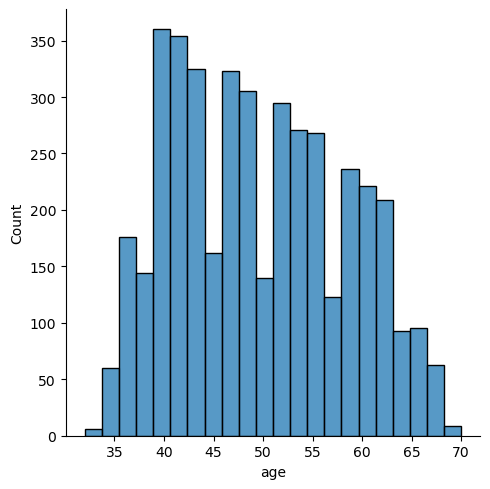

In [61]:
sns.displot(data=df,x='age')
plt.show()

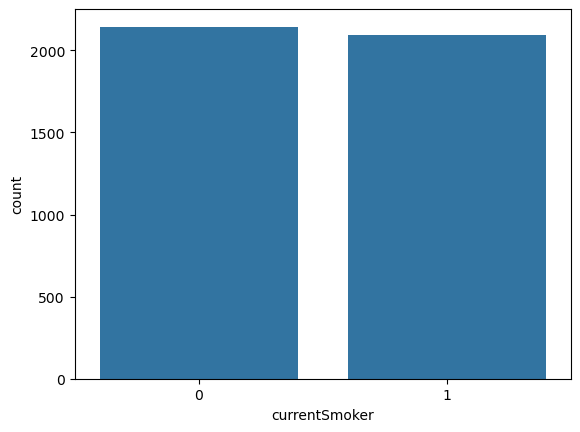

In [62]:
sns.countplot(data=df,x='currentSmoker',)
plt.show()

This shows that the people who don't smoke are more than people who smoke

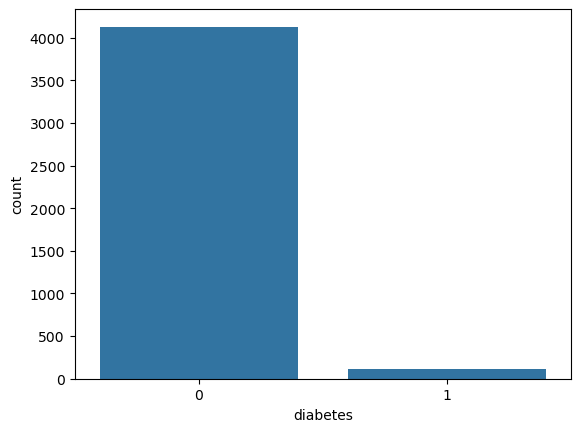

In [63]:
sns.countplot(data=df,x='diabetes')
plt.show()

Many People don't Suffer from Diabetes

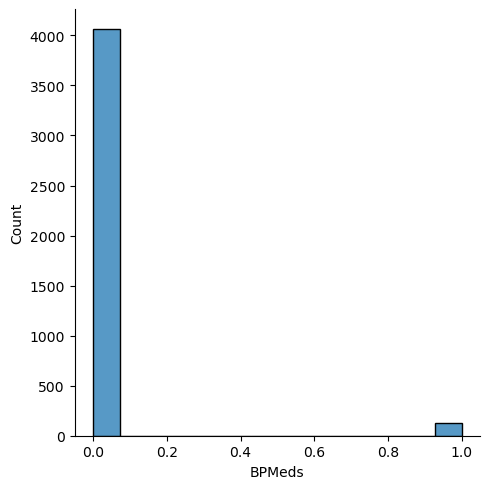

In [64]:
sns.displot(data=df,x='BPMeds',)
plt.show()

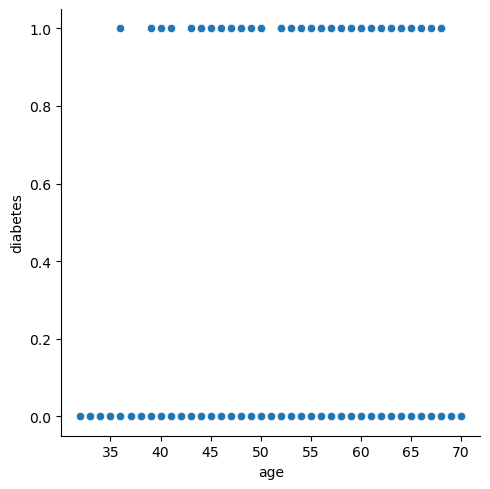

In [65]:
sns.relplot(data=df,x='age',y='diabetes')
plt.show()

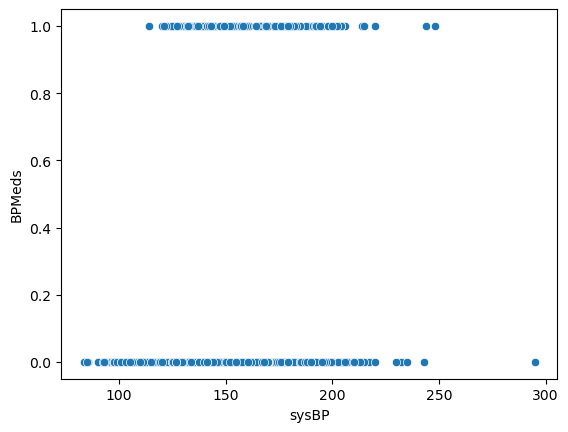

In [66]:
sns.scatterplot(data=df,x='sysBP',y='BPMeds')
plt.show()

Here It tells the High SysBP does'nt mean taking BP meds , as The person with sysBP of 300 Does'nt take BPMeds

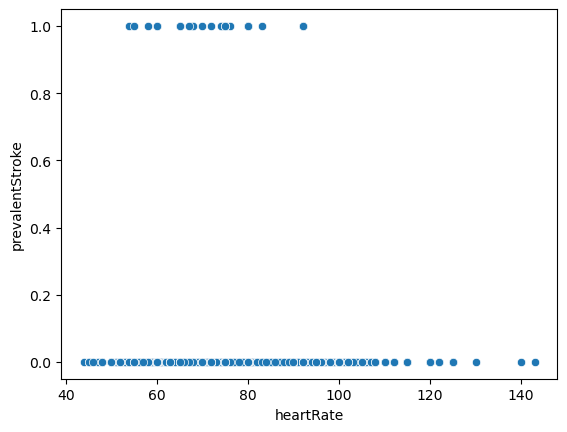

In [67]:
sns.scatterplot(data=df,x='heartRate',y='prevalentStroke')
plt.show()

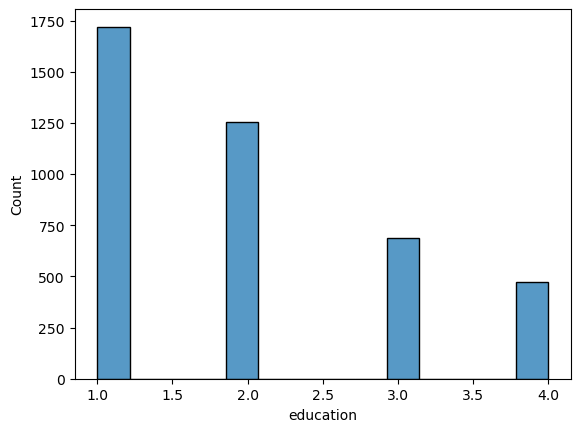

In [68]:
sns.histplot(data=df,x='education')
plt.show()

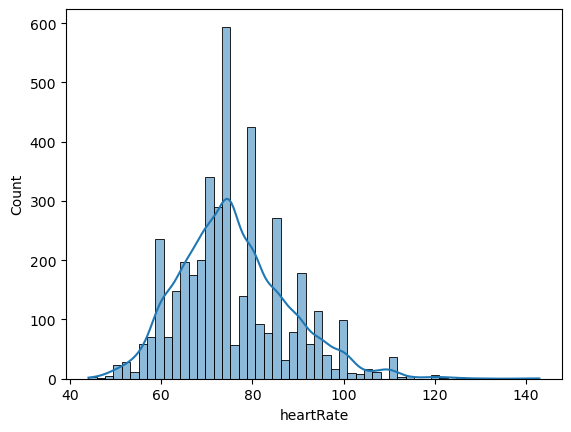

In [69]:
sns.histplot(data=df,x='heartRate',kde=1)
plt.show()

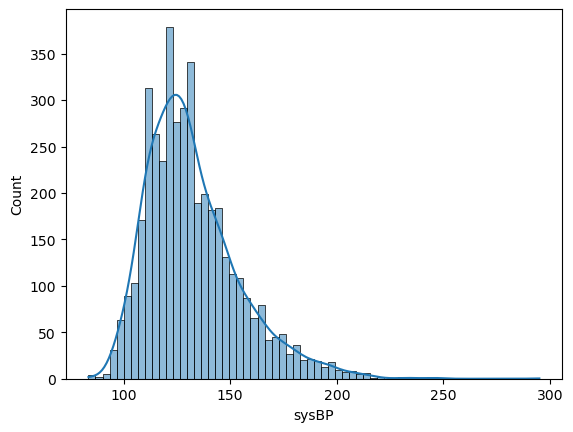

In [70]:
sns.histplot(data=df,x='sysBP',kde=1)
plt.show()

# Data Preprocessing and Feature Engineering

In [71]:
df['education'].value_counts()


education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64

In [72]:
df['glucose'].value_counts()


glucose
75.0     193
77.0     167
73.0     156
70.0     152
80.0     152
        ... 
191.0      1
256.0      1
235.0      1
210.0      1
260.0      1
Name: count, Length: 143, dtype: int64

In [73]:
df['BPMeds'].value_counts()


BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64

In [74]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

First of all We will have to remove all those Missing Values and as all those are Numerical Values so We will use Mean and Median

In [75]:
df.loc[df['education'].isnull()] = df['education'].median()
df.loc[df['BPMeds'].isnull()] = df['BPMeds'].median()
df.loc[df['cigsPerDay'].isnull()] = df['cigsPerDay'].median()
df.loc[df['totChol'].isnull()] = df['totChol'].mean()
df.loc[df['glucose'].isnull()] = df['glucose'].median()
df.loc[df['BMI'].isnull()] = df['BMI'].mean()
df.loc[df['heartRate'].isnull()] = df['heartRate'].mean()

In [76]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

As we can see in the above table , all the missing values are gone 

In [77]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


**Lets check for outliers**

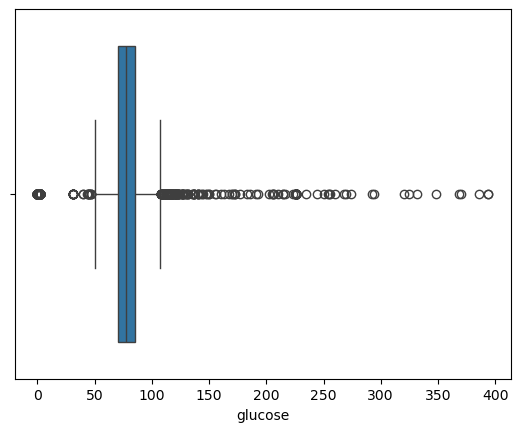

In [78]:
sns.boxplot(data=df,x='glucose')
plt.show()

In [79]:
  #Removing Outliers using IQR Method
  Q1 = df['glucose'].quantile(0.25)
  Q3 = df['glucose'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  df_filtered = df[(df['glucose'] >= lower_bound) & (df['glucose'] <= upper_bound)]

In [80]:
lower_bound

np.float64(47.5)

In [81]:
upper_bound

np.float64(107.5)

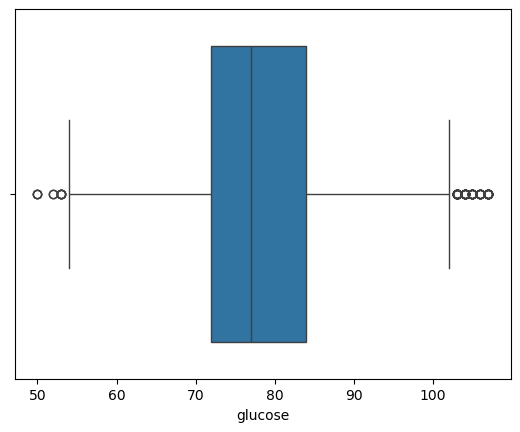

In [82]:
sns.boxplot(data=df_filtered,x='glucose')
plt.show()

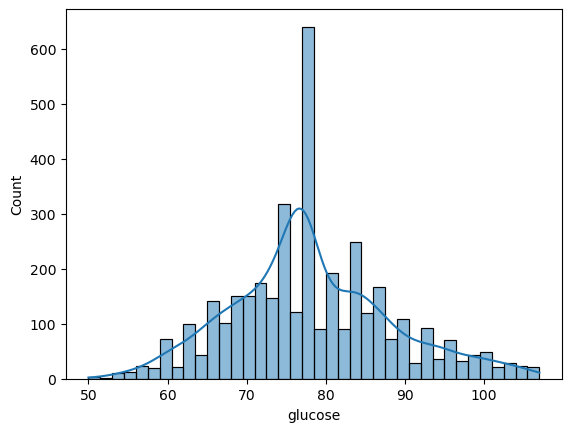

In [83]:
sns.histplot(data=df_filtered,x='glucose',kde=True)
plt.show()

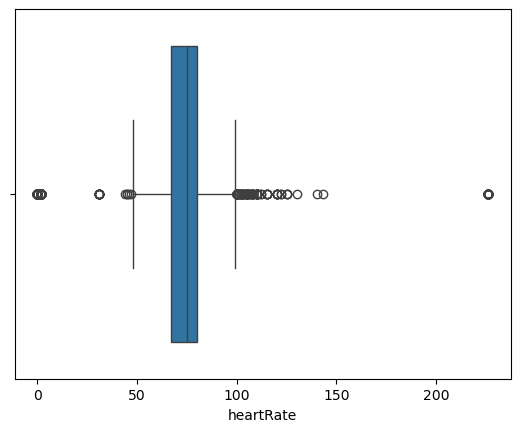

In [84]:
sns.boxplot(data=df,x='heartRate')
plt.show()

In [85]:
  Q1 = df['heartRate'].quantile(0.25)
  Q3 = df['heartRate'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  df_filtered = df[(df['heartRate'] >= lower_bound) & (df['heartRate'] <= upper_bound)]

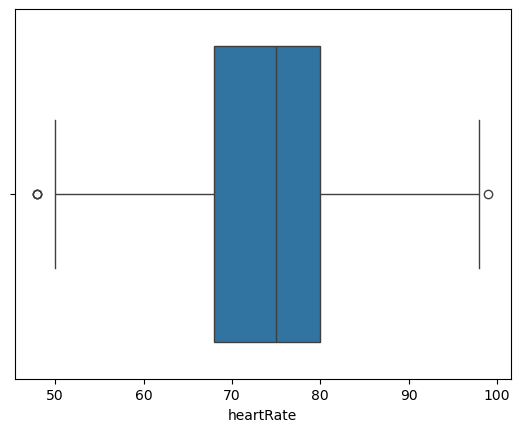

In [86]:
sns.boxplot(data=df_filtered,x='heartRate')
plt.show()

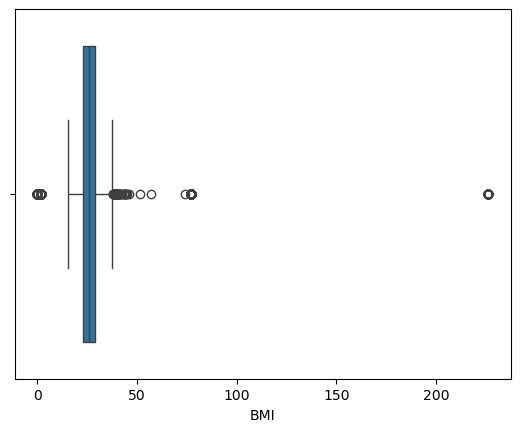

In [87]:
sns.boxplot(data=df,x='BMI')
plt.show()

In [88]:
  Q1 = df['BMI'].quantile(0.25)
  Q3 = df['BMI'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  df_filtered = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

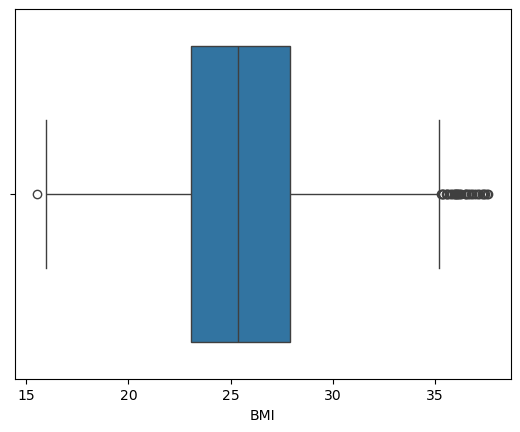

In [89]:
sns.boxplot(data=df_filtered,x='BMI')
plt.show()

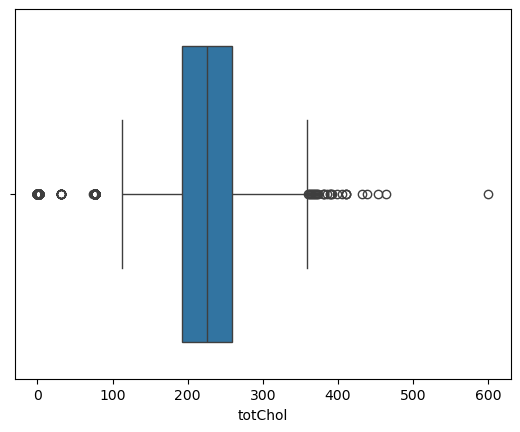

In [90]:
sns.boxplot(data=df,x='totChol')
plt.show()

In [91]:
  Q1 = df['totChol'].quantile(0.25)
  Q3 = df['totChol'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  df_filtered = df[(df['totChol'] >= lower_bound) & (df['totChol'] <= upper_bound)]

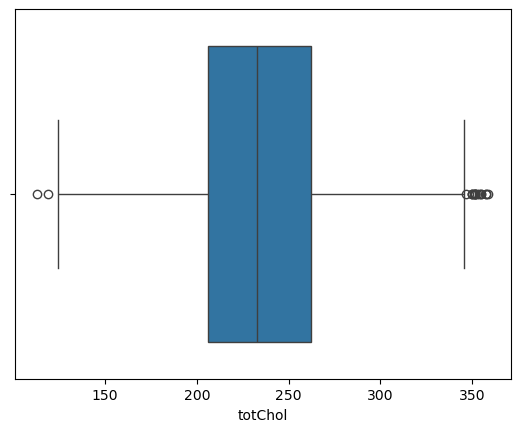

In [92]:
sns.boxplot(data=df_filtered,x='totChol')
plt.show()

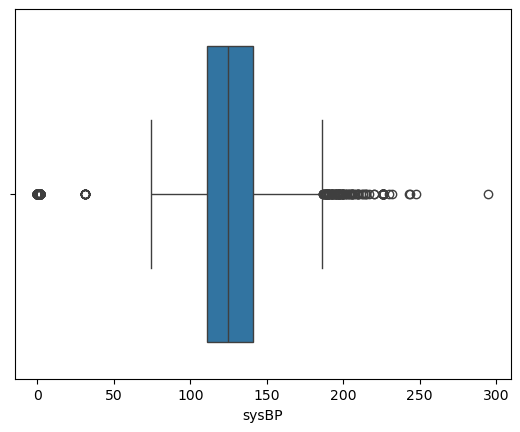

In [93]:
sns.boxplot(data=df,x='sysBP')
plt.show()

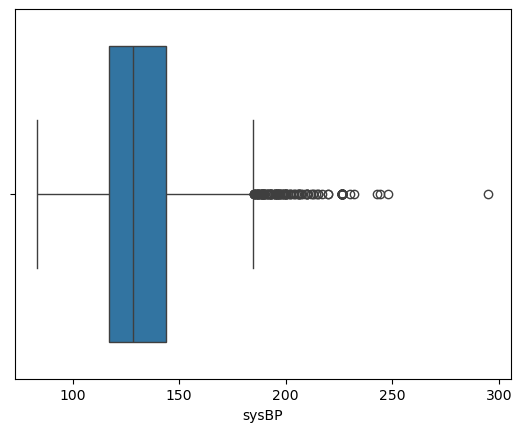

In [94]:
sns.boxplot(data=df_filtered,x='sysBP')
plt.show()

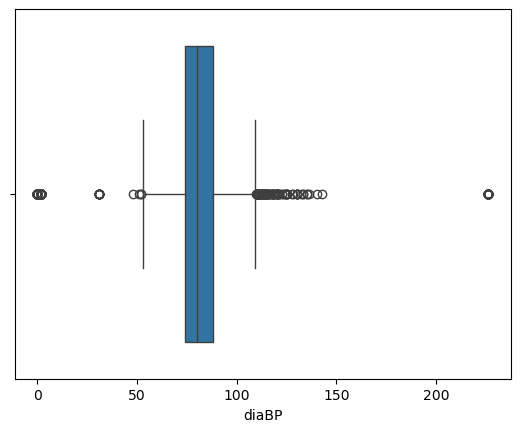

In [95]:
sns.boxplot(data=df,x='diaBP')
plt.show()

In [96]:
  Q1 = df['diaBP'].quantile(0.25)
  Q3 = df['diaBP'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  df_filtered = df[(df['diaBP'] >= lower_bound) & (df['diaBP'] <= upper_bound)]

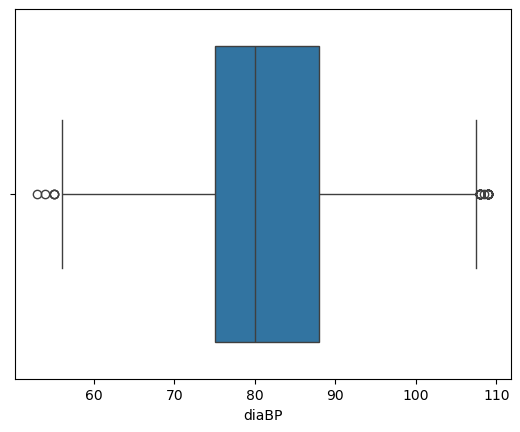

In [97]:
sns.boxplot(data=df_filtered,x='diaBP')
plt.show()

In [98]:
df['age'].value_counts()

age
77.000000     335
46.000000     166
40.000000     166
42.000000     161
48.000000     149
39.000000     146
41.000000     145
44.000000     143
45.000000     140
43.000000     137
52.000000     129
38.000000     124
50.000000     123
55.000000     123
51.000000     123
54.000000     119
49.000000     116
53.000000     116
47.000000     114
57.000000     108
56.000000     105
2.000000      105
59.000000     100
60.000000      98
58.000000      97
63.000000      96
61.000000      91
62.000000      91
0.000000       80
37.000000      80
64.000000      80
36.000000      77
226.158711     48
65.000000      46
67.000000      38
66.000000      34
35.000000      33
68.000000      16
34.000000      14
31.043050      13
33.000000       5
69.000000       5
74.140944       1
32.000000       1
70.000000       1
Name: count, dtype: int64

In [99]:
df_filtered.loc[df_filtered["age"]>100,"age"] = df_filtered.age.median()
df_filtered.loc[df_filtered["age"]<5,"age"] = df_filtered.age.median()

In [100]:
df['age'].value_counts()

age
77.000000     335
46.000000     166
40.000000     166
42.000000     161
48.000000     149
39.000000     146
41.000000     145
44.000000     143
45.000000     140
43.000000     137
52.000000     129
38.000000     124
50.000000     123
55.000000     123
51.000000     123
54.000000     119
49.000000     116
53.000000     116
47.000000     114
57.000000     108
56.000000     105
2.000000      105
59.000000     100
60.000000      98
58.000000      97
63.000000      96
61.000000      91
62.000000      91
0.000000       80
37.000000      80
64.000000      80
36.000000      77
226.158711     48
65.000000      46
67.000000      38
66.000000      34
35.000000      33
68.000000      16
34.000000      14
31.043050      13
33.000000       5
69.000000       5
74.140944       1
32.000000       1
70.000000       1
Name: count, dtype: int64

# Feature Selection

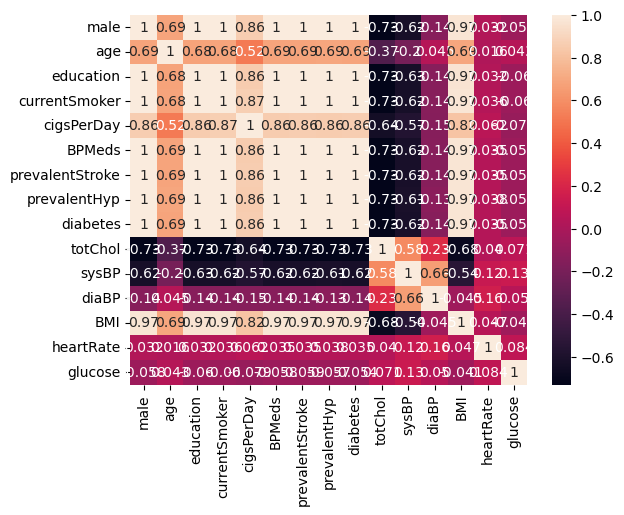

In [101]:
sns.heatmap(df_filtered.drop('TenYearCHD',axis=1).corr(),annot=True)
plt.show()

In [102]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,0.799995,0.999347,0.999824,0.933917,0.999868,0.999882,0.999794,0.999874,-0.348212,-0.023724,0.435063,0.960392,0.512355,0.356219,0.999845
age,0.799995,1.000000,0.804231,0.799249,0.757353,0.798800,0.798522,0.801012,0.798735,0.152171,0.471937,0.772080,0.894038,0.777246,0.623857,0.799845
education,0.999347,0.804231,1.000000,0.999353,0.932728,0.999389,0.999397,0.999307,0.999386,-0.338385,-0.015134,0.443364,0.962098,0.520958,0.362945,0.999340
currentSmoker,0.999824,0.799249,0.999353,1.000000,0.936299,0.999865,0.999878,0.999770,0.999867,-0.347788,-0.024138,0.434258,0.959973,0.513708,0.355855,0.999831
cigsPerDay,0.933917,0.757353,0.932728,0.936299,1.000000,0.931954,0.932006,0.931771,0.931975,-0.278528,0.016843,0.449587,0.906823,0.537839,0.360706,0.932262
BPMeds,0.999868,0.798800,0.999389,0.999865,0.931954,1.000000,0.999986,0.999908,0.999977,-0.349891,-0.025346,0.432665,0.959632,0.510815,0.354398,0.999934
prevalentStroke,0.999882,0.798522,0.999397,0.999878,0.932006,0.999986,1.000000,0.999901,0.999986,-0.350286,-0.026178,0.432129,0.959530,0.510633,0.354114,0.999941
prevalentHyp,0.999794,0.801012,0.999307,0.999770,0.931771,0.999908,0.999901,1.000000,0.999896,-0.347192,-0.019060,0.437633,0.960610,0.513264,0.356385,0.999873
diabetes,0.999874,0.798735,0.999386,0.999867,0.931975,0.999977,0.999986,0.999896,1.000000,-0.350044,-0.025845,0.432308,0.959612,0.510899,0.356257,0.999935
totChol,-0.348212,0.152171,-0.338385,-0.347788,-0.278528,-0.349891,-0.350286,-0.347192,-0.350044,1.000000,0.717088,0.493003,-0.142366,0.405504,0.371541,-0.348879


# Model Creation

In [103]:
X= df_filtered[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
Y = df_filtered[['TenYearCHD']]

In [104]:
X  #Input Values

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1.0,68.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0
4236,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.00,77.0,77.0


In [111]:
df_filtered.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [112]:
Y # Output Value

,TenYearCHD
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
4232,1.0
4233,1.0
4234,0.0
4236,77.0


In [113]:
# Importing train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=8)

In [114]:
X_train  # Training Data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3539,0.0,44.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,302.0,116.0,77.0,22.67,75.0,98.0
912,0.0,66.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,273.0,153.0,94.0,25.27,80.0,76.0
2318,1.0,60.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,195.0,107.5,72.0,26.53,70.0,80.0
3452,0.0,42.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,195.0,126.0,81.0,22.26,84.0,77.0
1665,1.0,50.0,2.0,1.0,30.0,0.0,0.0,0.0,0.0,258.0,124.0,78.0,24.33,72.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,1.0,58.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,287.0,145.0,72.5,26.27,88.0,206.0
2623,0.0,43.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,308.0,110.0,70.0,24.83,55.0,83.0
2218,1.0,43.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,226.0,132.5,85.0,26.64,72.0,58.0
1480,0.0,39.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,115.0,70.0,25.73,70.0,54.0


In [115]:
Y_train

,TenYearCHD
3539,0.0
912,0.0
2318,0.0
3452,0.0
1665,0.0
...,...
2378,1.0
2623,0.0
2218,0.0
1480,0.0


In [116]:
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2083,0.0,62.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,308.0,152.0,98.0,35.42,75.0,76.0
2652,1.0,47.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,210.0,131.0,74.0,18.88,60.0,86.0
1678,1.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,120.0,76.0,19.09,64.0,98.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0
728,0.0,37.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,168.0,117.0,74.0,21.51,67.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.00,77.0,77.0
4171,1.0,41.0,2.0,1.0,43.0,0.0,0.0,0.0,0.0,249.0,125.0,87.0,27.13,75.0,81.0
2213,1.0,62.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,295.0,139.0,80.0,21.28,63.0,97.0
61,0.0,67.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,254.0,157.0,89.0,24.25,60.0,74.0


In [117]:
# Importing Linear Regression 
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [118]:
Y_predict = LR.predict(X_test)  #Predicting Values

In [119]:
Y_predict

array([[ 2.20194730e-01],
       [ 1.90842204e-01],
       [ 2.53561852e-01],
       [ 2.18178773e-01],
       [ 3.24415813e-02],
       [ 2.42713951e-01],
       [ 7.69997944e+01],
       [ 3.57778467e-01],
       [ 1.29461665e-01],
       [ 8.54582219e-02],
       [ 2.49578210e-01],
       [ 1.78539148e-01],
       [ 2.26218570e-01],
       [ 8.10145139e-02],
       [ 1.92578148e-01],
       [ 2.21354214e-01],
       [ 1.04473815e-01],
       [ 1.72096793e-01],
       [ 1.36456349e-01],
       [ 4.47546673e-02],
       [ 2.97894786e-01],
       [ 1.41463006e-01],
       [ 1.05040058e-01],
       [ 7.50083283e-01],
       [ 8.25980859e-02],
       [ 7.87861608e-02],
       [ 2.24040727e-01],
       [ 8.33449563e-02],
       [ 3.04858974e-02],
       [ 1.49207918e-01],
       [ 2.61677112e-01],
       [ 1.65499907e-01],
       [ 7.69997944e+01],
       [ 2.10041056e-01],
       [ 1.92082626e-01],
       [ 2.19412531e-01],
       [ 1.75463255e-01],
       [ 2.92022656e-02],
       [ 1.6

In [120]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
r2 = r2_score(Y_test,Y_predict)

In [121]:
r2

0.9998123809348417

**This Shows that the Model is 99% Accurate to predict the Business Case**

In [126]:
df.shape


(4238, 16)

In [123]:
adjusted_r2 = 1-(1-0.99)*(4238-1)/(4238-16-1)
adjusted_r2

0.9899620942904525

In [124]:
MAE = mean_absolute_error(Y_test,Y_predict)
MAE

0.20032934111252435

# DONE